[*********************100%%**********************]  1 of 1 completed


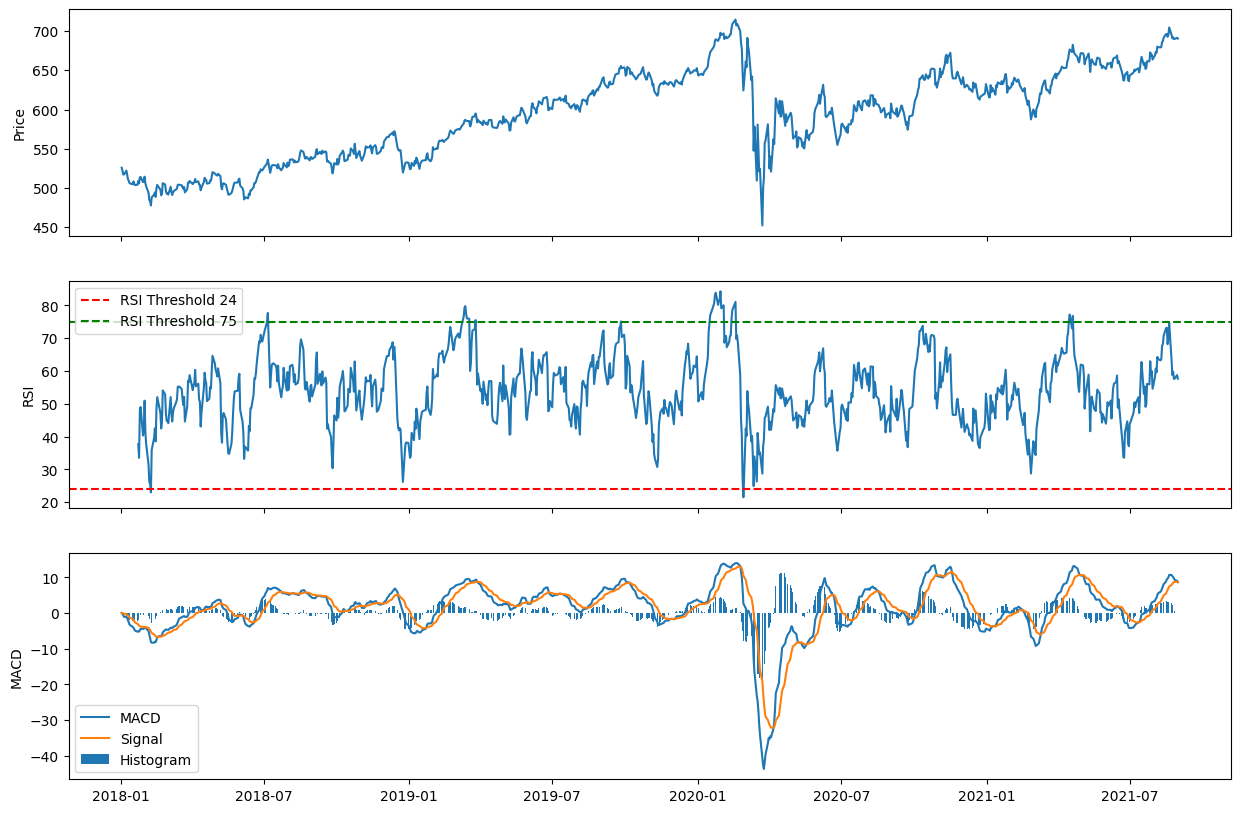

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the stock specifications
stock_symbol = "XAU=F"
start_date = "2018-01-01"
end_date = "2021-09-01"

# Download the stock data from Yahoo Finance
df = yf.download(stock_symbol, start=start_date, end=end_date)

# RSI = 100 - (100 / (1 + RS))

# Calculate the indicators
#RSI Calculation: You define a function calculate_rsi to calculate the Relative Strength Index (RSI) based on historical stock prices. It involves computing price differences and categorizing them as up or down changes.
def calculate_rsi(close_prices, window_length=14):
    diff = close_prices.diff(1).dropna()
    up_chg = 0 * diff
    down_chg = 0 * diff
    up_chg[diff > 0] = diff[diff > 0]
    down_chg[diff < 0] = diff[diff < 0]


#RSI Computation: The function calculates the moving averages of up and down changes, computes the relative strength (RS), and then calculates the RSI. It returns the RSI values, indexed by date.
    up_chg_avg = up_chg.ewm(com=window_length - 1, min_periods=window_length).mean() # Average gain



    #up_chg_avg[i] = (1 - com) * up_chg[i] + com * up_chg_avg[i-1]
    # com = 1 / window_length


    down_chg_avg = down_chg.ewm(com=window_length - 1, min_periods=window_length).mean() # Average loss

    rs = abs(up_chg_avg / down_chg_avg)
    rsi = 100 - 100 / (1 + rs)

    return rsi.reindex(close_prices.index)

def calculate_macd(close_prices, fast_period=17, slow_period=36, signal_period=14):
    exp1 = close_prices.ewm(span=fast_period, adjust=False).mean()
    exp2 = close_prices.ewm(span=slow_period, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=signal_period, adjust=False).mean()
    hist = macd - signal
    return macd, signal, hist

#RSI Calculation: You call the calculate_rsi function to compute RSI based on the historical closing prices and store the results in the rsi variable.
rsi = calculate_rsi(df['Close'])

#The remaining code calculates the Moving Average Convergence Divergence (MACD) and plots the stock price along with RSI and MACD indicators.
macd, macdsignal, macdhist = calculate_macd(df['Close'])

# Plot the stock price and the indicators
fig, axs = plt.subplots(3, sharex=True, figsize=(15,10))
axs[0].plot(df.index, df['Close'])
axs[0].set_ylabel('Price')
axs[1].plot(rsi.index, rsi.values)
axs[1].axhline(y=24, color='r', linestyle='--', label='RSI Threshold 24')
axs[1].axhline(y=75, color='g', linestyle='--', label='RSI Threshold 75')
axs[1].set_ylabel('RSI')
axs[1].legend()
axs[2].plot(df.index, macd, label='MACD')
axs[2].plot(df.index, macdsignal, label='Signal')
axs[2].bar(df.index, macdhist, label='Histogram')
axs[2].set_ylabel('MACD')
axs[2].legend()

plt.show()